In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

import orbit
from orbit.models import DLT
from orbit.diagnostics.plot import residual_diganostic_plot
from orbit.utils.dataset import load_iclaims
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
print(orbit.__version__)

1.1.3dev


In [4]:
# load log-transformed data
df = load_iclaims()
response_col = 'claims'
date_col = 'week'

In [5]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [6]:
dlt = DLT(
    response_col=response_col,
    date_col=date_col,
    estimator='stan-mcmc',
    seed=8888,
    seasonality=52,
    regressor_col=['trend.unemploy', 'trend.filling'],
    regressor_beta_prior=[0.1, 0.3],
    regressor_sigma_prior=[0.5, 2.0],
)

dlt.fit(df)
predicted_df = dlt.predict(df, decompose=True)

INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [7]:
residual_plot_df = pd.merge(df[['week', 'claims']], predicted_df[['week', 'prediction']], on ='week')
residual_plot_df['residual'] = residual_plot_df['claims'] - residual_plot_df['prediction'] 

/Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


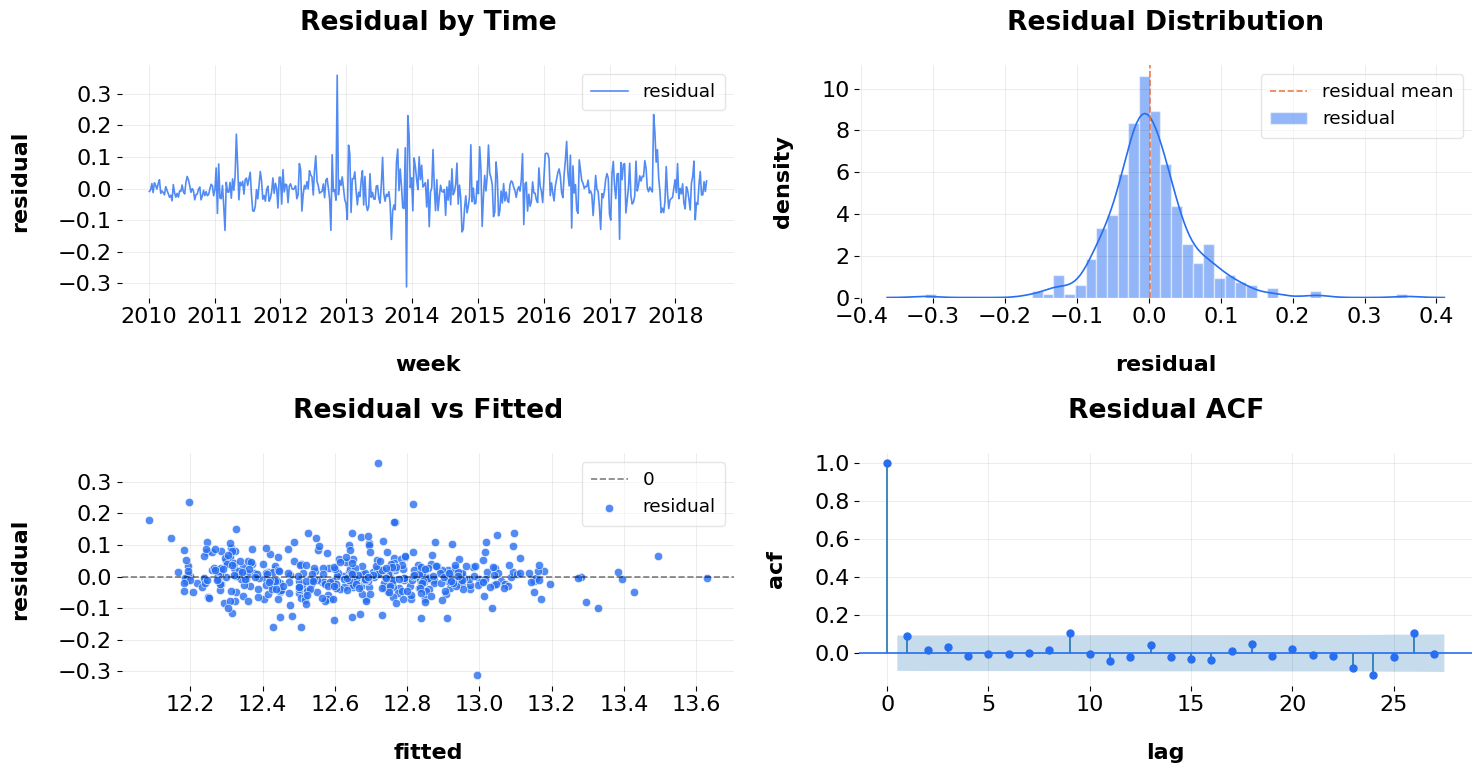

In [43]:
residual_diganostic_plot(df=residual_plot_df)